In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
train=pd.read_csv('train_data.txt',sep=':::',names=['ID','TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [6]:
train.GENRE.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

<AxesSubplot:>

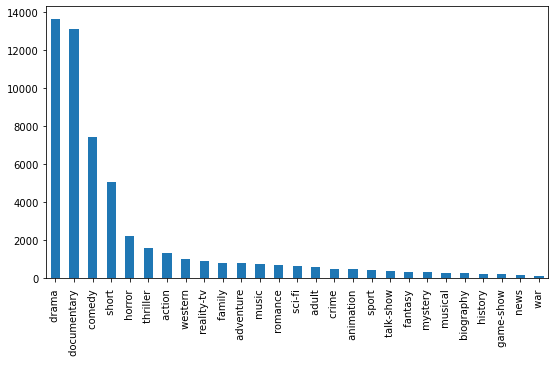

In [7]:
train["GENRE"].value_counts().plot(kind="bar",figsize=(9,5))

In [8]:
test=pd.read_csv('test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'], engine='python')

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [11]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS= set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to C:\Users\G MADHU
[nltk_data]     SUDHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package wordnet to C:\Users\G MADHU
[nltk_data]     SUDHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\G MADHU
[nltk_data]     SUDHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize
import re

def Pre_process_text(act_string):
    act_string= re.sub(r'[^a-zA-Z+]'," ", act_string)
    act_string = act_string.lower()
    Token_words = word_tokenize(act_string)
    new_string = [wordnet.lemmatize(word) for word in Token_words if not word in STOP_WORDS] # removing stopwords
    new_string = ' '.join(new_string)
    return new_string

In [14]:
train['DESC_clean']=train['DESCRIPTION'].apply(Pre_process_text)
train.head()

,ID,TITLE,GENRE,DESCRIPTION,DESC_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered body ground zer...


In [15]:
test['DESC_clean'] = test['DESCRIPTION'].apply(Pre_process_text)
test.head()

,ID,TITLE,DESCRIPTION,DESC_clean
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid .fit_transform(train["DESC_clean"])
X_Test =Tfid.transform(test["DESC_clean"])

In [17]:
features = X_train_Tfid
target = train["GENRE"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size =.8)

In [19]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
     
LR_model=LR_model.fit(X_train, y_train)
     
y_pred_LR = LR_model.predict(X_test)
y_pred_LR

array([' drama ', ' documentary ', ' drama ', ..., ' documentary ',
       ' comedy ', ' drama '], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred_LR)

0.579083279535184

In [21]:
from sklearn.naive_bayes import MultinomialNB
NB_model= MultinomialNB()
     
NB_model=NB_model.fit(X_train, y_train)
     
y_pred_NB = NB_model.predict(X_test)
y_pred_NB

array([' drama ', ' documentary ', ' drama ', ..., ' documentary ',
       ' drama ', ' drama '], dtype='<U13')

In [22]:
accuracy_score(y_test, y_pred_NB)

0.4442497463801531

In [23]:
# from sklearn.svm import SVC
# SVC_model= SVC(gamma='auto')
     
# SVC_model.fit(X_train, y_train)
     
# y_pred_SVC = SVC_model.predict(X_test)
# y_pred_SVC
# accuracy_score(y_test, y_pred_SVC)

In [24]:
Predicted_Test= LR_model.predict(X_Test)
test['Genre_Predicted'] = Predicted_Test
test.head()

,ID,TITLE,DESCRIPTION,DESC_clean,Genre_Predicted
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...,drama
